# Master thesis stuff

Import necessary packages and modules.

In [19]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import tensorflow as tf
import csv

import graph
from quantumGraphSolverFVM import QuantumGraphSolverFVM

Set up constants.

In [20]:
xth_frame = 5
# Time discretization of PINN
N_b = 200
# Time discretization of FVM
nt = N_b * xth_frame
# Spatial discretization of PINN
N_0 = 200
# Spatial discretization of FVM
nx = N_0 + 1

Generate Graph.

In [21]:
graph = graph.Example3()
graph.buildGraph()

Run FVM solver.

In [22]:
fvm_solver = QuantumGraphSolverFVM(graph)
u = fvm_solver.solve(nx=nx, nt=nt)

Timestep 1/1000
Timestep 2/1000
Timestep 3/1000
Timestep 4/1000
Timestep 5/1000
Timestep 6/1000
Timestep 7/1000
Timestep 8/1000
Timestep 9/1000
Timestep 10/1000
Timestep 11/1000
Timestep 12/1000
Timestep 13/1000
Timestep 14/1000
Timestep 15/1000
Timestep 16/1000
Timestep 17/1000
Timestep 18/1000
Timestep 19/1000
Timestep 20/1000
Timestep 21/1000
Timestep 22/1000
Timestep 23/1000
Timestep 24/1000
Timestep 25/1000
Timestep 26/1000
Timestep 27/1000
Timestep 28/1000
Timestep 29/1000
Timestep 30/1000
Timestep 31/1000
Timestep 32/1000
Timestep 33/1000
Timestep 34/1000
Timestep 35/1000
Timestep 36/1000
Timestep 37/1000
Timestep 38/1000
Timestep 39/1000
Timestep 40/1000
Timestep 41/1000
Timestep 42/1000
Timestep 43/1000
Timestep 44/1000
Timestep 45/1000
Timestep 46/1000
Timestep 47/1000
Timestep 48/1000
Timestep 49/1000
Timestep 50/1000
Timestep 51/1000
Timestep 52/1000
Timestep 53/1000
Timestep 54/1000
Timestep 55/1000
Timestep 56/1000
Timestep 57/1000
Timestep 58/1000
Timestep 59/1000
Timest

Timestep 515/1000
Timestep 516/1000
Timestep 517/1000
Timestep 518/1000
Timestep 519/1000
Timestep 520/1000
Timestep 521/1000
Timestep 522/1000
Timestep 523/1000
Timestep 524/1000
Timestep 525/1000
Timestep 526/1000
Timestep 527/1000
Timestep 528/1000
Timestep 529/1000
Timestep 530/1000
Timestep 531/1000
Timestep 532/1000
Timestep 533/1000
Timestep 534/1000
Timestep 535/1000
Timestep 536/1000
Timestep 537/1000
Timestep 538/1000
Timestep 539/1000
Timestep 540/1000
Timestep 541/1000
Timestep 542/1000
Timestep 543/1000
Timestep 544/1000
Timestep 545/1000
Timestep 546/1000
Timestep 547/1000
Timestep 548/1000
Timestep 549/1000
Timestep 550/1000
Timestep 551/1000
Timestep 552/1000
Timestep 553/1000
Timestep 554/1000
Timestep 555/1000
Timestep 556/1000
Timestep 557/1000
Timestep 558/1000
Timestep 559/1000
Timestep 560/1000
Timestep 561/1000
Timestep 562/1000
Timestep 563/1000
Timestep 564/1000
Timestep 565/1000
Timestep 566/1000
Timestep 567/1000
Timestep 568/1000
Timestep 569/1000
Timestep 5

Define function for writing csv.

In [79]:
def write_csv(fvm, j=0):
        u = fvm.u
        
        with open('FVM_results.csv', 'w', newline='') as f:
            thewriter = csv.writer(f)
            for i in range(u.shape[0]):
                for j in range(u.shape[1]):
                    thewriter.writerow([i, j, u[i,j]])
                    # the right input parameters are needed

Write csv.

In [80]:
write_csv(fvm_solver)

PermissionError: [Errno 13] Permission denied: 'FVM_results.csv'

Some plotting.

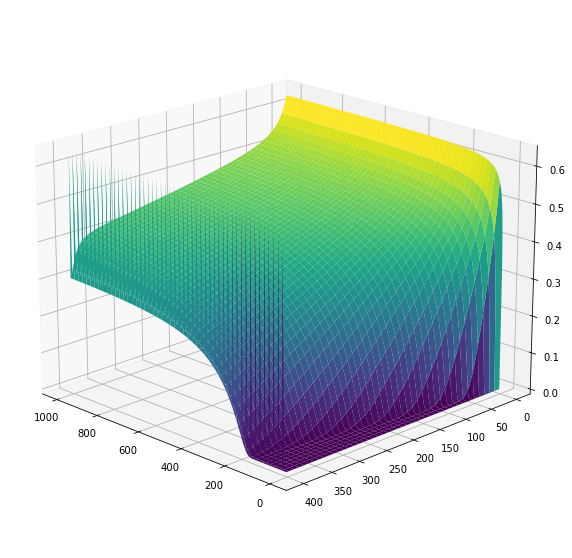

In [81]:
Eidx = 0

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
Nt = 60
Nx = 120

xspace = tf.linspace(1, 401, 401)
tspace = tf.linspace(1, 1000, 1000)
T, X = tf.meshgrid(tspace, xspace)
TX=tf.stack([tf.reshape(T,-1), tf.reshape(X,-1)],axis=1)
U = fvm_solver.u
U = tf.reshape(U, T.shape)
ax.plot_surface(T, X, U, cmap='viridis')
ax.view_init(19, 135)

# Approximating with FNN

Generate Neural Network

In [117]:
from keras.models import Sequential
from keras.layers import Dense

ffn = Sequential()
ffn.add(Dense(16, input_dim=2, activation='relu'))
ffn.add(Dense(16, activation='relu'))
ffn.add(Dense(1, activation='relu'))

ffn.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['accuracy'])

Load Data.

In [118]:
dataset = np.loadtxt('FVM_results.csv', delimiter=',')
xt = dataset[:,0:2]
u = dataset[:,2]

Train Model.

In [119]:
ffn.fit(xt, u, epochs=3, batch_size=10)

Epoch 1/3
40100/40100 [==============================] - 26s 640us/step - loss: 0.7676 - accuracy: 0.0123
Epoch 2/3
40100/40100 [==============================] - 29s 724us/step - loss: 0.1545 - accuracy: 0.0123
Epoch 3/3
40100/40100 [==============================] - 29s 727us/step - loss: 0.1545 - accuracy: 0.0123


Evaluate model.

In [120]:
accuracy = ffn.evaluate(xt, u)
print(accuracy)

12532/12532 [==============================] - 7s 520us/step - loss: 0.1545 - accuracy: 0.0123
[0.15453988313674927, 0.012254363857209682]


Plot results.

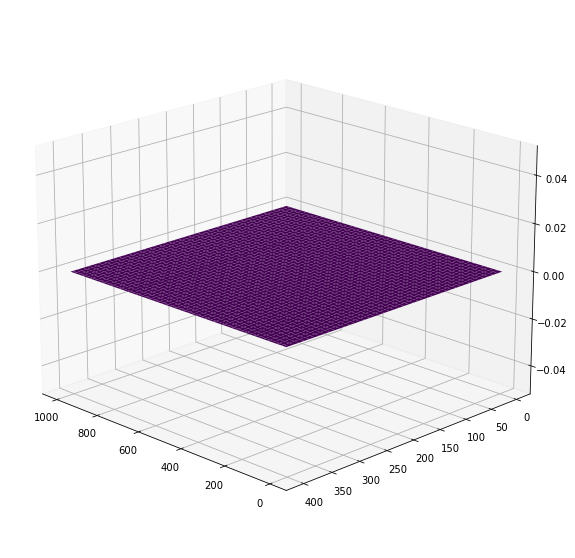

In [121]:
u_ffn = ffn(xt)

Eidx = 0

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
Nt = 60
Nx = 120

xspace = tf.linspace(1, 401, 401)
tspace = tf.linspace(1, 1000, 1000)
T, X = tf.meshgrid(tspace, xspace)
TX=tf.stack([tf.reshape(T,-1), tf.reshape(X,-1)],axis=1)
U = u_ffn
U = tf.reshape(U, T.shape)
ax.plot_surface(T, X, U, cmap='viridis')
ax.view_init(19, 135)

# Approximating with ResNet

Define Residual Network.

In [105]:
class ResNet(tf.keras.Model):

    def __init__(self,
                 ResNetLayers=1,
                 ResNetNeurons=16,
                 ResNetStepsize=1.0,
                 **kwargs):
        
        super(ResNet, self).__init__(**kwargs)
        
        RNact = tf.keras.activations.get('relu')
        
        self.ResNetLayers = ResNetLayers
        self.ResNetStepsize = ResNetStepsize

        self.ResNet = [tf.keras.layers.Dense(ResNetNeurons,
                                        activation=RNact) for _ in range(self.ResNetLayers)]
        
        self.wb = tf.keras.layers.Dense(1)
        self.A = tf.keras.layers.Dense(2, use_bias=False)
        self.c = tf.keras.layers.Dense(1, use_bias=False)
        
        #self.num_hidden_layers = num_hidden_layers
        self.input_dim = 2
        self.output_dim = 1

        
    def call(self, input_tensor, training=False):
        """Forward-pass through neural network."""
        N = self.ResNet[0](input_tensor, training=training)
        for i in range(1, self.ResNetLayers):
            N = N + self.ResNetStepsize * self.ResNet[i](N, training=training)
        Phi = self.wb(N, training=training)
        #print(input_tensor)
        As = self.A(input_tensor, training=training)
        #print(As)
        sAs = tf.keras.layers.Dot(axes=(1))([input_tensor, As])
        #print(sAs)
        Phi += .5 * sAs
        #print(Phi.shape)
        Phi += self.c(input_tensor, training=training)
            
        return Phi

Generate Residual network.

In [122]:
resnet = ResNet()
resnet.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['accuracy'])

Train network.

In [108]:
resnet.fit(xt, u, epochs=3, batch_size=10)

Epoch 1/3
40100/40100 [==============================] - 25s 622us/step - loss: 7512415.0000 - accuracy: 0.0052
Epoch 2/3
40100/40100 [==============================] - 28s 706us/step - loss: 1437.3220 - accuracy: 0.0055
Epoch 3/3
40100/40100 [==============================] - 31s 778us/step - loss: 1571.3759 - accuracy: 0.0068


Evaluate Network

In [110]:
accuracy = resnet.evaluate(xt, u)
print(accuracy)

12532/12532 [==============================] - 5s 378us/step - loss: 13.3354 - accuracy: 0.0036
[13.335429191589355, 0.0035685785114765167]


In [112]:
u_resnet = resnet(xt)

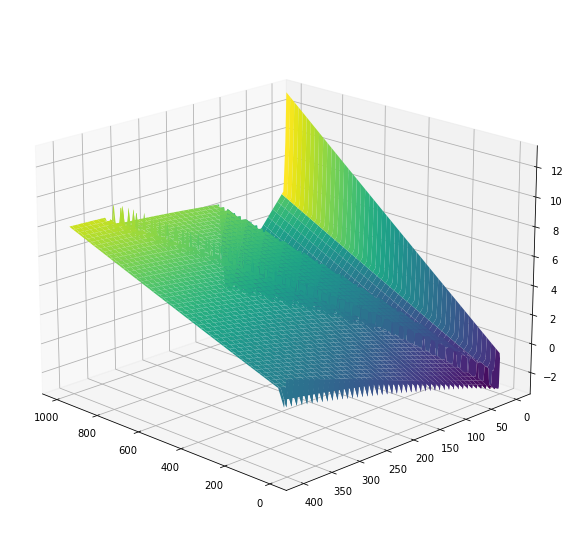

In [114]:



Eidx = 0

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
Nt = 60
Nx = 120

xspace = tf.linspace(1, 401, 401)
tspace = tf.linspace(1, 1000, 1000)
T, X = tf.meshgrid(tspace, xspace)
TX=tf.stack([tf.reshape(T,-1), tf.reshape(X,-1)],axis=1)
U = u_resnet
U = tf.reshape(U, T.shape)
ax.plot_surface(T, X, U, cmap='viridis')
ax.view_init(19, 135)
